---
### House prize prediction

Comparison: Linear regression, Random Forest, XGBoost, Neural Network

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

In [4]:
X_train = pd.read_csv('dane/california_housing_train.csv')
X_test = pd.read_csv('dane/california_housing_test.csv')

In [5]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [8]:
'''
y_train = X_train['median_house_value']
y_test = X_test['median_house_value']
X_train = X_train.drop(columns=['median_house_value'])
X_test = X_test.drop(columns=['median_house_value'])
'''

In [9]:
X = pd.concat([X_train, X_test], axis=0)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [10]:
X.shape

(20000, 9)

In [11]:
corr_matrix = X.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

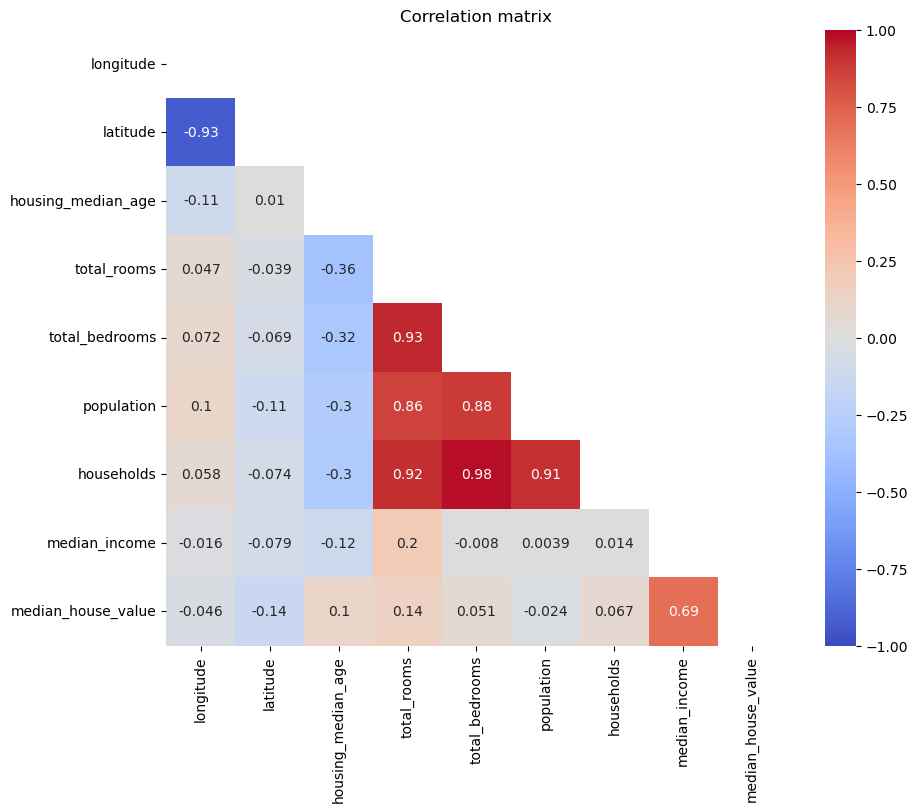

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

In [14]:
y = X['median_house_value']
X = X['median_income']

In [15]:
y.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [16]:
X.head()

0    1.4936
1    1.8200
2    1.6509
3    3.1917
4    1.9250
Name: median_income, dtype: float64

In [17]:
y.shape

(20000,)

In [18]:
X.shape

(20000,)

In [19]:
X = X.values.reshape(-1, 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Regresja liniowa

In [22]:
mr = LinearRegression()
mr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = mr.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAPE: {round(mape*100,2)}%')

MSE: 7063306872.962101
MAPE: 37.92%


In [39]:
print(f'coef: {mr.coef_}')
print(f'intercept: {mr.intercept_}')

coef: [42219.68876367]
intercept: 43489.03212316541


In [40]:
from sympy import symbols, Eq, print_latex
from sympy import init_printing

init_printing()
x,a,b = symbols('x a b')
a_value = mr.coef_[0]
b_value = mr.intercept_

equation = Eq(symbols('y'), a_value * x + b_value)

# Wyświetl równanie
print_latex(equation)


y = 42219.6887636742 x + 43489.0321231654


In [41]:
import matplotlib.pyplot as plt

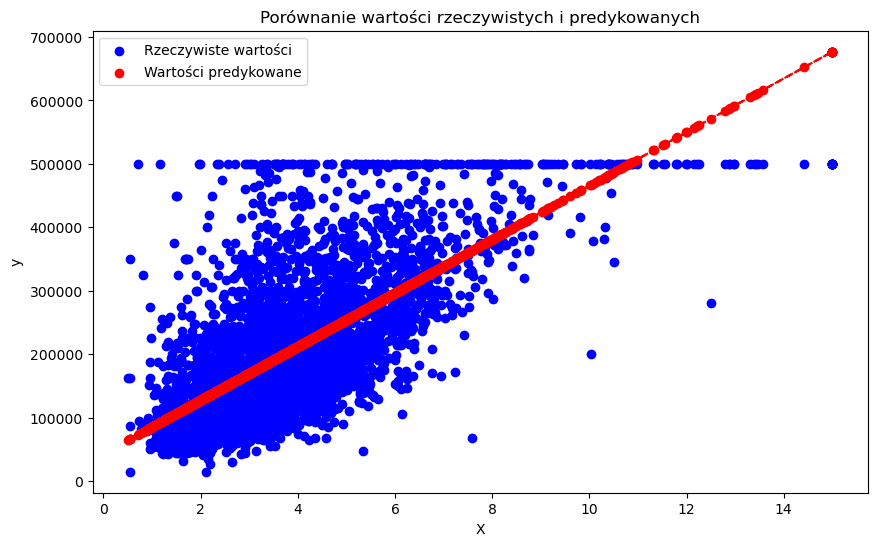

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste wartości')
plt.scatter(X_test, y_pred, color='red', label='Wartości predykowane')
plt.plot(X_test, y_pred, color='red', linestyle='dashed')
plt.title('Porównanie wartości rzeczywistych i predykowanych')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### LAS LOSOWY

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
mrf = RandomForestRegressor()

In [47]:
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 4, 6, 8],
    'criterion': ['squared_error', 'absolute_error']
}

In [48]:
grid_search = GridSearchCV(estimator=mrf, param_grid=param_grid, cv=2, scoring='neg_mean_absolute_error')

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 4, 6, 8],
                         'n_estimators': [50, 75, 100]},
             scoring='neg_mean_absolute_error')

In [50]:
# Najlepsze parametry i wynik
print(f'Najlepsze parametry: {grid_search.best_params_}')
print(f'Najlepszy wynik: {grid_search.best_score_}')

Najlepsze parametry: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 50}
Najlepszy wynik: -59543.69343375


In [51]:
# Przewidujemy wartości na podstawie zestawu testowego za pomocą najlepszego modelu
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAPE: {round(mape*100,2)}%')

MSE: 7166954127.546788
MAPE: 32.54%


### XGBoost

In [53]:
from xgboost import XGBRegressor

In [54]:
dir(XGBRegressor)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'best_iteration',
 'best_score',
 'coef_',
 'evals_result',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xg

In [55]:
?XGBRegressor

Init signature:
XGBRegressor(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : typing.Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with hig

In [56]:
mxgb = XGBRegressor()

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [59]:
grid_search = GridSearchCV(estimator=mxgb, param_grid=param_grid, cv=2, scoring='neg_mean_absolute_error')

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5, 7],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_absolute_error')

In [61]:
print(f'Najlepsze parametry: {grid_search.best_params_}')
print(f'Najlepszy wynik: {grid_search.best_score_}')

Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Najlepszy wynik: -61515.04242822266


In [62]:
# Przewidujemy wartości na podstawie zestawu testowego za pomocą najlepszego modelu
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'MAPE: {round(mape*100,2)}%')

Mean Absolute Error: 61212.77987695312
MSE: 6830105570.195716
MAPE: 37.24%


### Sieć neuronowa

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [65]:
X_train = pd.read_csv('dane/california_housing_train.csv')
X_test = pd.read_csv('dane/california_housing_test.csv')

In [66]:
X = pd.concat([X_train, X_test], axis=0)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
y = X['median_house_value']
X = X.drop(columns=['median_house_value'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

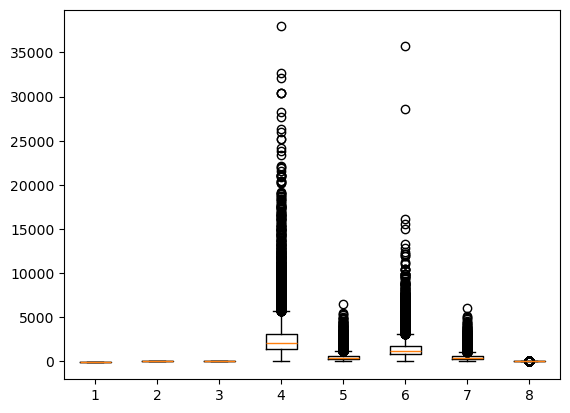

In [70]:
plt.boxplot(X_train)
plt.show()

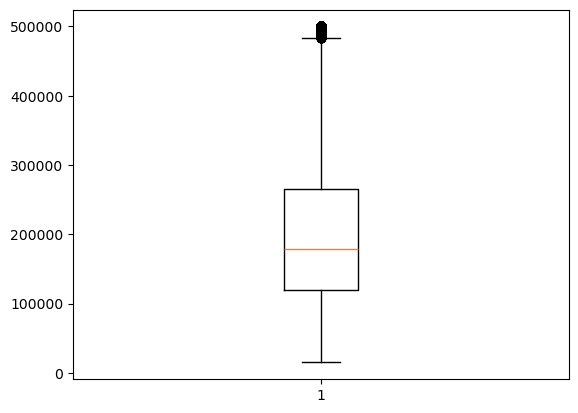

In [71]:
plt.boxplot(y_train)
plt.show()

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

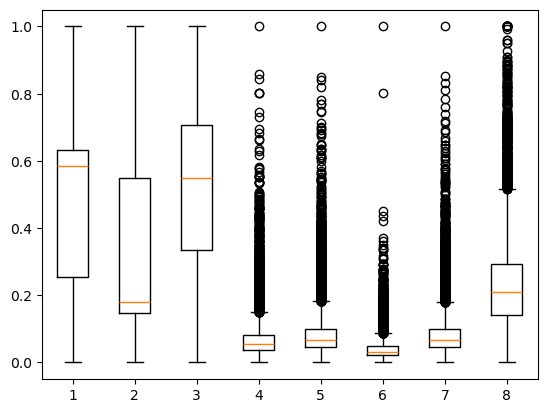

In [73]:
plt.boxplot(X_train)
plt.show()

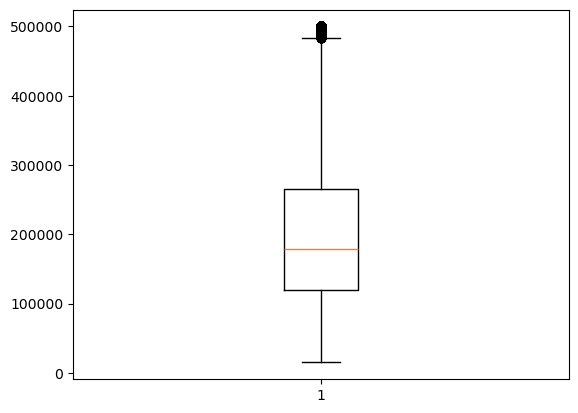

In [74]:
plt.boxplot(y_train)
plt.show()

In [75]:
mnn = Sequential()
mnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# mnn.add(Dropout(0.1))
mnn.add(Dense(32, activation='relu'))
# mnn.add(Dropout(0.1))
mnn.add(Dense(1))

d:\Programy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
mnn.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [77]:
history_nn = mnn.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs = 100,
    validation_data = (X_test,y_test)
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 56026624000.0000 - val_loss: 47454060544.0000
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 37849092096.0000 - val_loss: 13352930304.0000
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12454066176.0000 - val_loss: 11671771136.0000
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11830764544.0000 - val_loss: 11296746496.0000
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11398414336.0000 - val_loss: 10890029056.0000
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11041375232.0000 - val_loss: 10449367040.0000
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10576043008.0000 - val_loss: 9961469952.0000
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10144527360.0000 - val_loss: 9407195136.0000
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9445443584.0000 - val_loss: 8785138688.0000
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━

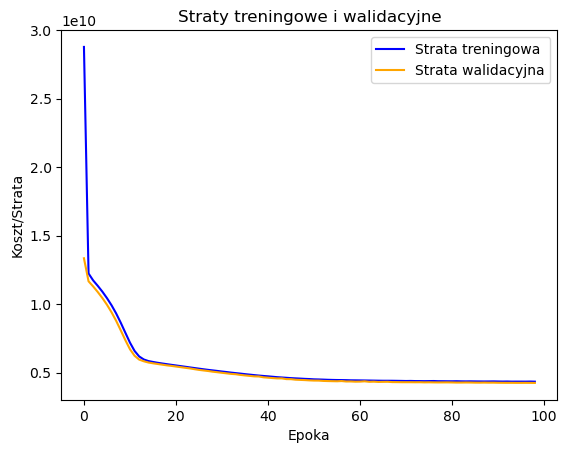

In [78]:
plt.plot(history_nn.history["loss"][1:], color='blue', label='Strata treningowa')
plt.plot(history_nn.history["val_loss"][1:], color='orange', label='Strata walidacyjna')
plt.title('Straty treningowe i walidacyjne')
plt.xlabel('Epoka')
plt.ylabel('Koszt/Strata')
plt.legend()
plt.show()

In [79]:
y_pred = mnn.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [80]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {round(mape*100,2)}%')

Mean Absolute Error: 46185.25335546875
MAPE: 25.82%


In [81]:
r2_score(y_test, y_pred)

### NN - dropout

In [82]:
mnn2 = Sequential()
mnn2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
mnn2.add(Dropout(0.2))
mnn2.add(Dense(32, activation='relu'))
mnn2.add(Dropout(0.2))
mnn2.add(Dense(1))

d:\Programy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
mnn2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [84]:
history_nn2 = mnn2.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs = 100,
    validation_data = (X_test,y_test)
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 55306698752.0000 - val_loss: 43293278208.0000
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 32259127296.0000 - val_loss: 12078413824.0000
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12952693760.0000 - val_loss: 11552192512.0000
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12477851648.0000 - val_loss: 11112141824.0000
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11961810944.0000 - val_loss: 10659402752.0000
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11537075200.0000 - val_loss: 10106263552.0000
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11081689088.0000 - val_loss: 9517257728.0000
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10373352448.0000 - val_loss: 8885971968.0000
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9728754688.0000 - val_loss: 8123092480.0000
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━

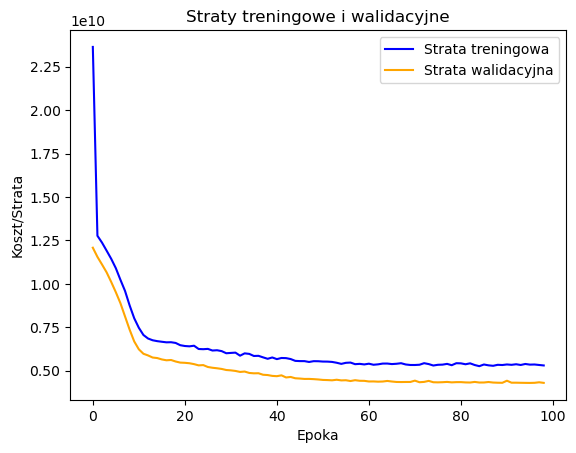

In [85]:
plt.plot(history_nn2.history["loss"][1:], color='blue', label='Strata treningowa')
plt.plot(history_nn2.history["val_loss"][1:], color='orange', label='Strata walidacyjna')
plt.title('Straty treningowe i walidacyjne')
plt.xlabel('Epoka')
plt.ylabel('Koszt/Strata')
plt.legend()
plt.show()

In [86]:
y_pred = mnn2.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [87]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {round(mape*100,2)}%')

Mean Absolute Error: 46320.816205078125
MAPE: 25.72%
